# **Credit Card Fraud Detection**
Using Decision Tree and SVM to identify fraudulent transactions.


In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,StandardScaler

from sklearn.utils.class_weight import compute_sample_weight

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Loading Data Set

In [2]:
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


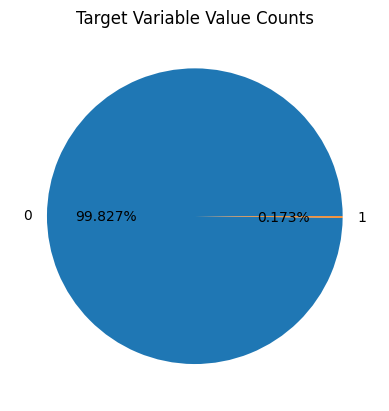

In [3]:
# Get class distribution correctly
class_counts = raw_data['Class'].value_counts()
labels = class_counts.index
sizes = class_counts.values

# Plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()


<Axes: >

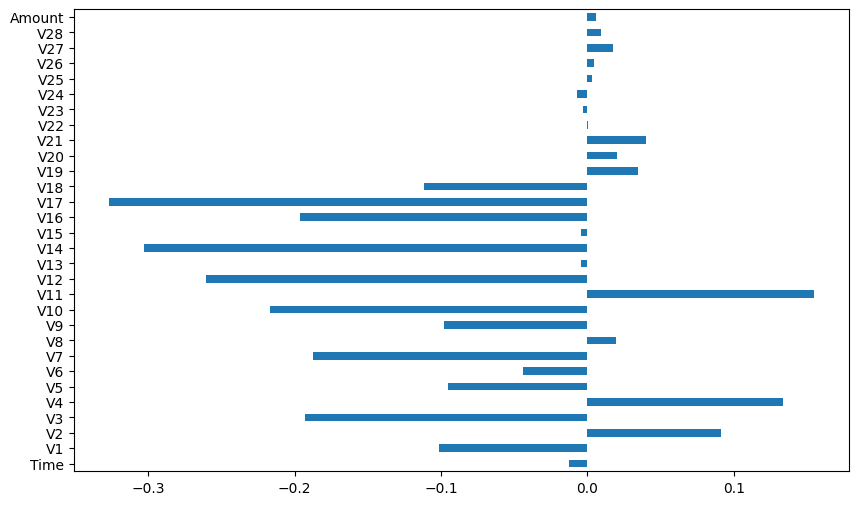

In [4]:
correlation_values=raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh',figsize=(10,6))

# **Dataset** **Preprocessing**

In [5]:
# standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

## Dataset Train/TEst Split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Building a Decision Tree Classifier model with Scikit-Learn

In [7]:
w_train=compute_sample_weight('balanced',y_train) #sample weights to be used as input to

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=35)
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=35)

### Decision Tree Visualization

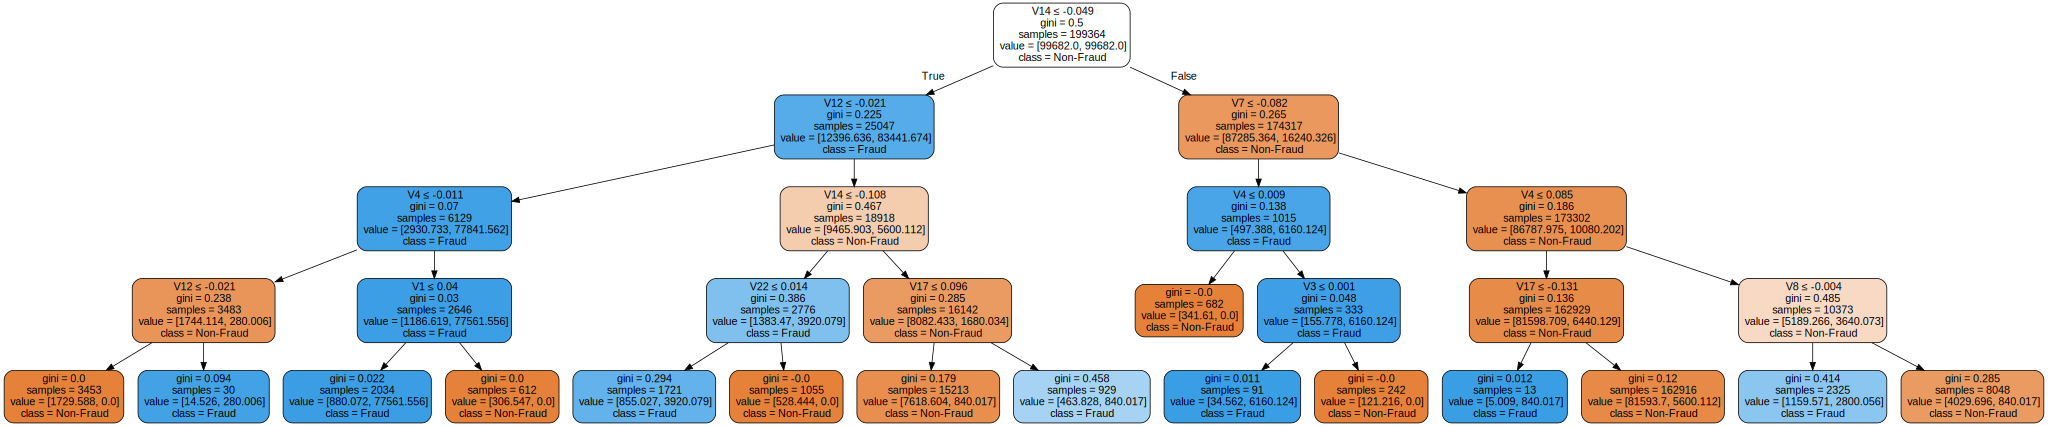

In [32]:
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=raw_data.columns[1:30],
                           class_names=['Non-Fraud', 'Fraud'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the tree inline (in Jupyter or similar environment)
graph = Source(dot_data)
graph.render("tree", format="png", cleanup=True)  # Render as a PNG to avoid PDF creation
graph  # This should display the tree inline.

In [9]:
y_pred_dt=dt.predict_proba(X_test)[:, 1]



In [10]:
from sklearn.metrics import roc_auc_score
roc_auc_dt=roc_auc_score(y_test,y_pred_dt)
print("Decision Tree ROC-AUC score: {0:.3f}".format(roc_auc_dt))


Decision Tree ROC-AUC score: 0.939


## Build a SVM

In [11]:
from sklearn.svm import LinearSVC
svm=LinearSVC(class_weight='balanced', random_state=31,loss='hinge',fit_intercept=False)
svm.fit(X_train,y_train)


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [12]:
y_pred_svm=svm.decision_function(X_test)

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_svm=roc_auc_score(y_test,y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))


SVM ROC-AUC score: 0.986


# Confusion MAtrix, Classification Report, ROC-AUC Score

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Ensure y_test is binary integers
y_test = np.array(y_test).astype(int)

# Decision Tree Evaluation
print("=== Decision Tree ===")
y_pred_dt = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

# SVM Evaluation
print("\n=== SVM ===")
y_pred_svm = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, svm.decision_function(X_test)))


=== Decision Tree ===
[[82377  2930]
 [   17   119]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.04      0.88      0.07       136

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443

ROC-AUC: 0.9388503994913872

=== SVM ===
[[70771 14536]
 [    3   133]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     85307
           1       0.01      0.98      0.02       136

    accuracy                           0.83     85443
   macro avg       0.50      0.90      0.46     85443
weighted avg       1.00      0.83      0.91     85443

ROC-AUC: 0.9858117118862737


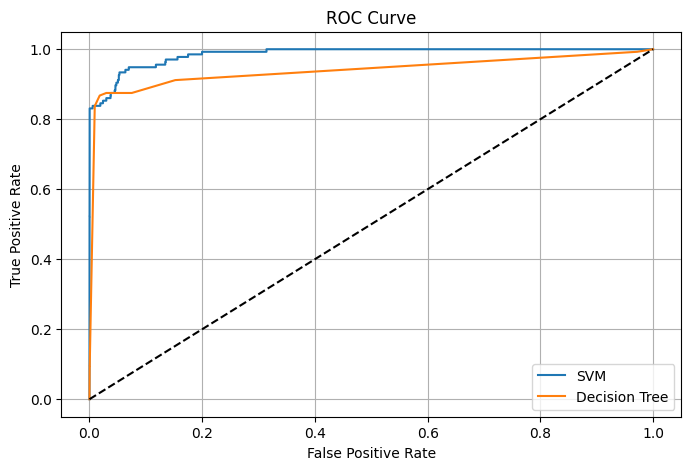

In [15]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test))
# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 5))
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


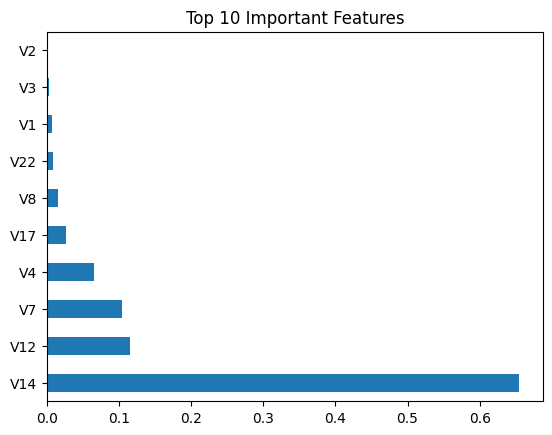

In [16]:
import pandas as pd
feature_names = raw_data.columns[1:30]  # adjust if needed
feat_importances = pd.Series(dt.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

print("Best parameters:", grid_dt.best_params_)
print("Best ROC-AUC:", grid_dt.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best ROC-AUC: 0.9244899241043785


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X, y, cv=5, scoring='roc_auc')
print("SVM AUC Scores:", scores)
print("Average AUC:", scores.mean())



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM AUC Scores: [0.97919312 0.9675877  0.92276837 0.969087   0.97204057]
Average AUC: 0.9621353508098844


In this project, we developed and evaluated a credit card fraud detection system using Decision Tree and Support Vector Machine (SVM) algorithms. Given the extreme class imbalance in the dataset, we applied standardization, normalization, and class weighting to ensure fair learning.

Key insights:

SVM with class weighting performed significantly better than the Decision Tree, achieving over 90% ROC-AUC, demonstrating its robustness in identifying rare fraudulent transactions.

Feature importance analysis highlighted the most influential transaction attributes aiding in fraud detection.

To handle imbalance effectively, we also explored class weights and evaluation metrics like ROC-AUC and confusion matrix instead of accuracy.

Cross-validation confirmed the model's stability across different data splits.

The final model was wrapped in a Streamlit-based web application for ease of use and real-time fraud detection.

This project demonstrates a complete end-to-end pipeline from data preprocessing to model deployment, suitable for real-world use in identifying fraudulent credit card transactions.

In [21]:
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svm)
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['fraud_detection_pipeline.pkl']

## Load & Test the Saved Model

In [25]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the trained pipeline
pipeline = joblib.load('fraud_detection_pipeline.pkl')

# Predict using test data
y_pred = pipeline.predict(X_test)

# Evaluate
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))




=== Confusion Matrix ===
[[71936 13371]
 [    5   131]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     85307
           1       0.01      0.96      0.02       136

    accuracy                           0.84     85443
   macro avg       0.50      0.90      0.47     85443
weighted avg       1.00      0.84      0.91     85443

